In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [32]:
from fastai import *
from fastai.vision import *
from fastai.metrics import error_rate

In [3]:
help(untar_data)

Help on function untar_data in module fastai.datasets:

untar_data(url: str, fname: Union[pathlib.Path, str] = None, dest: Union[pathlib.Path, str] = None, data=True, force_download=False) -> pathlib.Path
    Download `url` to `fname` if it doesn't exist, and un-tgz to folder `dest`.



In [4]:
path = untar_data(URLs.PETS); path

PosixPath('/Users/pravar.dilip.mahajan@ibm.com/.fastai/data/oxford-iiit-pet')

In [5]:
path.ls()

[PosixPath('/Users/pravar.dilip.mahajan@ibm.com/.fastai/data/oxford-iiit-pet/images'),
 PosixPath('/Users/pravar.dilip.mahajan@ibm.com/.fastai/data/oxford-iiit-pet/annotations')]

In [6]:
path_img = path/"images"
path_labels = path/"annotations"
path_img, path_labels

(PosixPath('/Users/pravar.dilip.mahajan@ibm.com/.fastai/data/oxford-iiit-pet/images'),
 PosixPath('/Users/pravar.dilip.mahajan@ibm.com/.fastai/data/oxford-iiit-pet/annotations'))

In [7]:
fnames = get_image_files(path_img)
fnames[:5]

[PosixPath('/Users/pravar.dilip.mahajan@ibm.com/.fastai/data/oxford-iiit-pet/images/Egyptian_Mau_167.jpg'),
 PosixPath('/Users/pravar.dilip.mahajan@ibm.com/.fastai/data/oxford-iiit-pet/images/pug_52.jpg'),
 PosixPath('/Users/pravar.dilip.mahajan@ibm.com/.fastai/data/oxford-iiit-pet/images/basset_hound_112.jpg'),
 PosixPath('/Users/pravar.dilip.mahajan@ibm.com/.fastai/data/oxford-iiit-pet/images/Siamese_193.jpg'),
 PosixPath('/Users/pravar.dilip.mahajan@ibm.com/.fastai/data/oxford-iiit-pet/images/shiba_inu_122.jpg')]

In [8]:
np.random.seed(2) #fix seed
pat = r'/([^/]+)_\d+.jpg$'

In [18]:
data = ImageDataBunch.from_name_re(path, fnames, pat, ds_tfms=get_transforms(), size=224, num_workers=0)
data.normalize(imagenet_stats)

ImageDataBunch;

Train: LabelList (5912 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Egyptian_Mau,pug,basset_hound,Siamese,Siamese
Path: /Users/pravar.dilip.mahajan@ibm.com/.fastai/data/oxford-iiit-pet;

Valid: LabelList (1478 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
wheaten_terrier,Ragdoll,scottish_terrier,Sphynx,Siamese
Path: /Users/pravar.dilip.mahajan@ibm.com/.fastai/data/oxford-iiit-pet;

Test: None

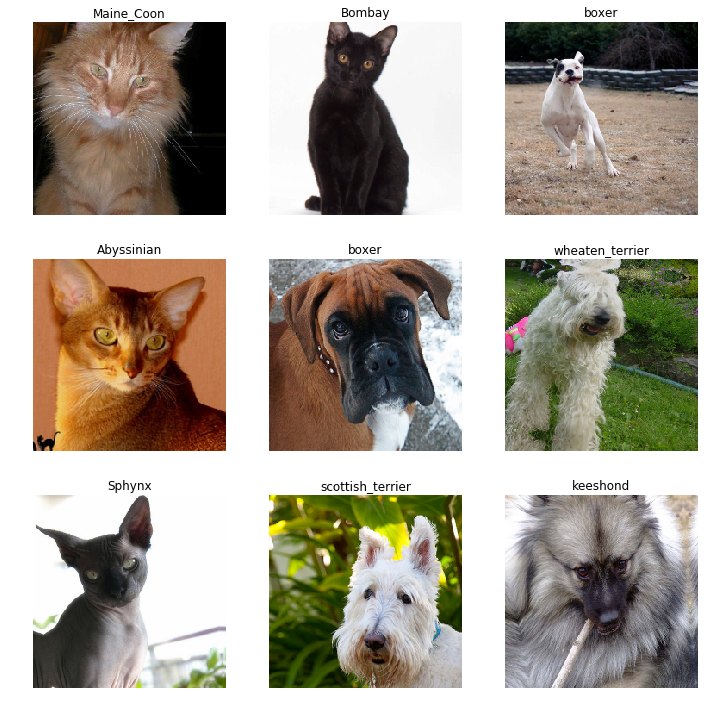

In [22]:
data.show_batch(rows=3, figsize=(10, 10))

In [25]:
data.classes, data.c

(['Abyssinian',
  'Bengal',
  'Birman',
  'Bombay',
  'British_Shorthair',
  'Egyptian_Mau',
  'Maine_Coon',
  'Persian',
  'Ragdoll',
  'Russian_Blue',
  'Siamese',
  'Sphynx',
  'american_bulldog',
  'american_pit_bull_terrier',
  'basset_hound',
  'beagle',
  'boxer',
  'chihuahua',
  'english_cocker_spaniel',
  'english_setter',
  'german_shorthaired',
  'great_pyrenees',
  'havanese',
  'japanese_chin',
  'keeshond',
  'leonberger',
  'miniature_pinscher',
  'newfoundland',
  'pomeranian',
  'pug',
  'saint_bernard',
  'samoyed',
  'scottish_terrier',
  'shiba_inu',
  'staffordshire_bull_terrier',
  'wheaten_terrier',
  'yorkshire_terrier'],
 37)

# Training the Model

In [26]:
help(models)

Help on package fastai.vision.models in fastai.vision:

NAME
    fastai.vision.models

PACKAGE CONTENTS
    cadene_models
    darknet
    presnet
    unet
    wrn
    xception
    xresnet
    xresnet2

DATA
    xresnet101 = functools.partial(<function xresnet at 0x12bcdb9...ion=4,...
    xresnet152 = functools.partial(<function xresnet at 0x12bcdb9...ion=4,...
    xresnet18 = functools.partial(<function xresnet at 0x12bcdb9...nsion=1...
    xresnet34 = functools.partial(<function xresnet at 0x12bcdb9...nsion=1...
    xresnet50 = functools.partial(<function xresnet at 0x12bcdb9...nsion=4...

FILE
    /Users/pravar.dilip.mahajan@ibm.com/git/fastai/venv/lib/python3.7/site-packages/fastai/vision/models/__init__.py




In [28]:
models.__dict__

{'__name__': 'fastai.vision.models',
 '__doc__': None,
 '__package__': 'fastai.vision.models',
 '__loader__': <_frozen_importlib_external.SourceFileLoader at 0x12bccad30>,
 '__spec__': ModuleSpec(name='fastai.vision.models', loader=<_frozen_importlib_external.SourceFileLoader object at 0x12bccad30>, origin='/Users/pravar.dilip.mahajan@ibm.com/git/fastai/venv/lib/python3.7/site-packages/fastai/vision/models/__init__.py', submodule_search_locations=['/Users/pravar.dilip.mahajan@ibm.com/git/fastai/venv/lib/python3.7/site-packages/fastai/vision/models']),
 '__path__': ['/Users/pravar.dilip.mahajan@ibm.com/git/fastai/venv/lib/python3.7/site-packages/fastai/vision/models'],
 '__file__': '/Users/pravar.dilip.mahajan@ibm.com/git/fastai/venv/lib/python3.7/site-packages/fastai/vision/models/__init__.py',
 '__cached__': '/Users/pravar.dilip.mahajan@ibm.com/git/fastai/venv/lib/python3.7/site-packages/fastai/vision/models/__pycache__/__init__.cpython-37.pyc',
 '__builtins__': {'__name__': 'builtins

In [30]:
import fastai
help(fastai.metrics)

Help on module fastai.metrics in fastai:

NAME
    fastai.metrics - Implements various metrics to measure training accuracy

CLASSES
    fastai.callback.Callback(builtins.object)
        AUROC
        ConfusionMatrix
            KappaScore
            MatthewsCorreff
        Perplexity
    CMScores(ConfusionMatrix)
        FBeta
        Precision
        Recall
    RegMetrics(fastai.callback.Callback)
        ExpRMSPE
        ExplainedVariance
        R2Score
        RMSE
    
    class AUROC(fastai.callback.Callback)
     |  AUROC() -> None
     |  
     |  Calculate the auc score based on the roc curve. Restricted to the binary classification task.
     |  
     |  Method resolution order:
     |      AUROC
     |      fastai.callback.Callback
     |      builtins.object
     |  
     |  Methods defined here:
     |  
     |  __eq__(self, other)
     |  
     |  __init__(self) -> None
     |  
     |  __repr__(self)
     |  
     |  on_batch_end(self, last_output: torch.Tensor, last_

In [33]:
learner = create_cnn(data, models.resnet34, metrics=error_rate)

/Users/pravar.dilip.mahajan@ibm.com/git/fastai/venv/lib/python3.7/site-packages/fastai/vision/learner.py:105: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")
Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /Users/pravar.dilip.mahajan@ibm.com/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [00:05<00:00, 15607291.92it/s]


In [ ]:
learner.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
